In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from protest_impact.data.news.coverage_filter import filter_protests
from protest_impact.data.protests.random import get_random_events

random_events = get_random_events(100)
random_events = filter_protests(random_events, source="mediacloud")

In [6]:
from functools import partial

import numpy as np
import optuna
from protest_impact.synthetic_region import (
    evaluate_multiple_protests,
    predict_with_boosting,
    predict_with_lasso,
    predict_with_linear_regression,
    predict_with_mean,
    predict_with_random_forest,
)


def objective(trial):
    method = trial.suggest_categorical(
        "method", ["mean", "lasso", "linear", "random_forest", "boosting"]
    )
    if method == "mean":
        method = predict_with_mean
    elif method == "lasso":
        method = predict_with_lasso
    elif method == "linear":
        method = predict_with_linear_regression
    elif method == "random_forest":
        method = predict_with_random_forest
    else:
        method = predict_with_boosting
    metrics, dfs, agg_df = evaluate_multiple_protests(
        "klimaschutz",
        random_events,
        source="mediacloud",
        data_kwargs=dict(
            min_control_regions=3, n_protest_free_days=7 * 4, n_days=7 * 4
        ),
        method_kwargs=dict(
            method=method,
        ),
    )
    return np.mean([m["mse"] for m in metrics])


study = optuna.create_study(
    direction="minimize",
    study_name="synthetic_region_v0_17",
    storage="sqlite:///db.sqlite3",
    load_if_exists=True,
    # sampler=optuna.samplers.RandomSampler(),
    sampler=optuna.samplers.TPESampler(),
)
study.optimize(objective, n_trials=10)

[I 2023-04-08 11:45:28,819] A new study created in RDB with name: synthetic_region_v0_17


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:30,160] Trial 0 finished with value: 0.5898776587759677 and parameters: {'method': 'mean'}. Best is trial 0 with value: 0.5898776587759677.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:32,791] Trial 1 finished with value: 0.7580849127133823 and parameters: {'method': 'random_forest'}. Best is trial 0 with value: 0.5898776587759677.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:35,408] Trial 2 finished with value: 0.7439061368182623 and parameters: {'method': 'random_forest'}. Best is trial 0 with value: 0.5898776587759677.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:36,736] Trial 3 finished with value: 0.5436963384550654 and parameters: {'method': 'lasso'}. Best is trial 3 with value: 0.5436963384550654.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:38,433] Trial 4 finished with value: 0.87749543528193 and parameters: {'method': 'boosting'}. Best is trial 3 with value: 0.5436963384550654.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:39,825] Trial 5 finished with value: 0.5436963384550654 and parameters: {'method': 'lasso'}. Best is trial 3 with value: 0.5436963384550654.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:41,177] Trial 6 finished with value: 0.5364674194423279 and parameters: {'method': 'linear'}. Best is trial 6 with value: 0.5364674194423279.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:42,515] Trial 7 finished with value: 0.5364674194423279 and parameters: {'method': 'linear'}. Best is trial 6 with value: 0.5364674194423279.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:44,238] Trial 8 finished with value: 0.8756223397771238 and parameters: {'method': 'boosting'}. Best is trial 6 with value: 0.5364674194423279.


  0%|          | 0/78 [00:00<?, ?it/s]

[I 2023-04-08 11:45:45,532] Trial 9 finished with value: 0.5898776587759677 and parameters: {'method': 'mean'}. Best is trial 6 with value: 0.5364674194423279.


In [7]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_method,state
0,0,0.589878,2023-04-08 11:45:28.825384,2023-04-08 11:45:30.153922,0 days 00:00:01.328538,mean,COMPLETE
1,1,0.758085,2023-04-08 11:45:30.162432,2023-04-08 11:45:32.786543,0 days 00:00:02.624111,random_forest,COMPLETE
2,2,0.743906,2023-04-08 11:45:32.793202,2023-04-08 11:45:35.403022,0 days 00:00:02.609820,random_forest,COMPLETE
3,3,0.543696,2023-04-08 11:45:35.409734,2023-04-08 11:45:36.731122,0 days 00:00:01.321388,lasso,COMPLETE
4,4,0.877495,2023-04-08 11:45:36.738174,2023-04-08 11:45:38.429233,0 days 00:00:01.691059,boosting,COMPLETE
5,5,0.543696,2023-04-08 11:45:38.436262,2023-04-08 11:45:39.819993,0 days 00:00:01.383731,lasso,COMPLETE
6,6,0.536467,2023-04-08 11:45:39.826957,2023-04-08 11:45:41.173159,0 days 00:00:01.346202,linear,COMPLETE
7,7,0.536467,2023-04-08 11:45:41.179568,2023-04-08 11:45:42.510510,0 days 00:00:01.330942,linear,COMPLETE
8,8,0.875622,2023-04-08 11:45:42.517362,2023-04-08 11:45:44.233989,0 days 00:00:01.716627,boosting,COMPLETE
9,9,0.589878,2023-04-08 11:45:44.240716,2023-04-08 11:45:45.527696,0 days 00:00:01.286980,mean,COMPLETE


In [27]:
from protest_impact.synthetic_region import (
    evaluate_multiple_protests,
    predict_with_lasso,
    predict_with_linear_regression,
    predict_with_mean,
)

random_events = get_random_events(5_000)
random_events = filter_protests(random_events, source="mediacloud")

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klima*",
    random_events,
    source="mediacloud",
    data_kwargs=dict(min_control_regions=3, n_protest_free_days=0, n_days=7 * 4 * 3),
    method_kwargs=dict(
        method=predict_with_linear_regression,
    ),
)

  0%|          | 0/4007 [00:00<?, ?it/s]

In [28]:
random_events["event_date"].dt.day_of_week.value_counts()

2    608
1    604
3    582
0    574
5    562
6    548
4    529
Name: event_date, dtype: int64

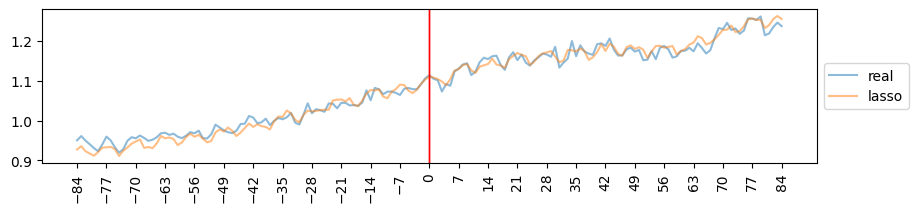

In [30]:
import matplotlib.pyplot as plt
from protest_impact.data.discourse.visual import plot_coverage_sequence

fig, ax = plt.subplots(figsize=(10, 2))
plot_coverage_sequence(agg_df.rename(columns={"real": "count"}), ax=ax, label="real")
plot_coverage_sequence(agg_df.rename(columns={"synth": "count"}), ax=ax, label="lasso")
plt.show()

2021-02-17 Sachsen-Anhalt
MSE: 1.541882515859796


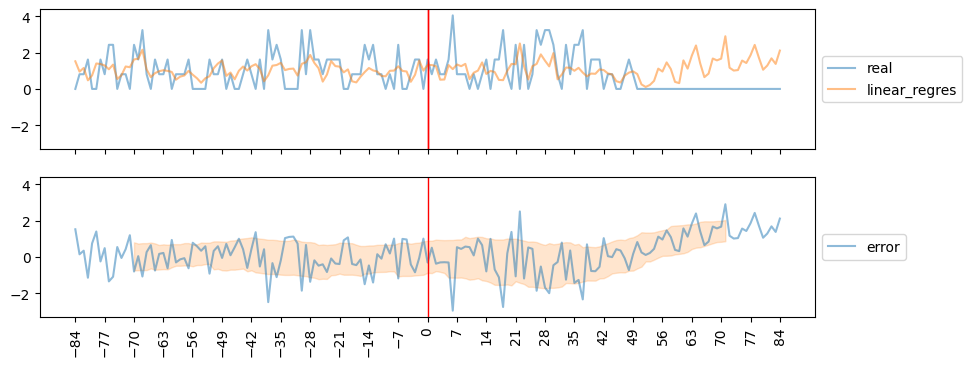

----------


2021-02-18 Brandenburg
MSE: 0.2849721100130327


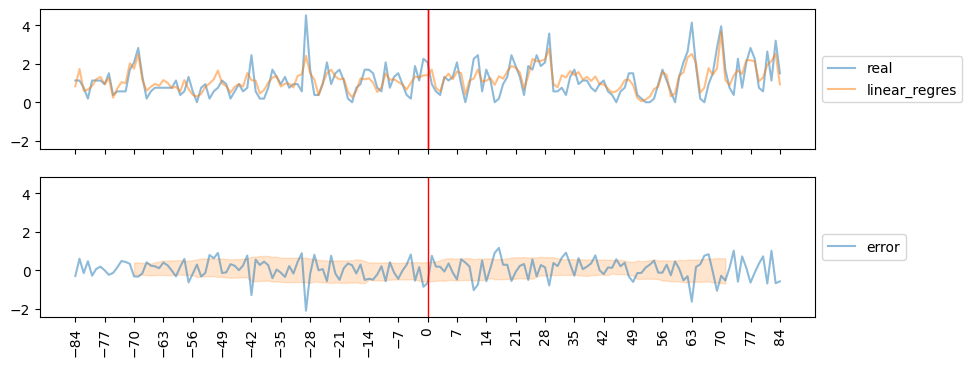

----------


2020-06-20 Hamburg
MSE: 0.1555535263338877


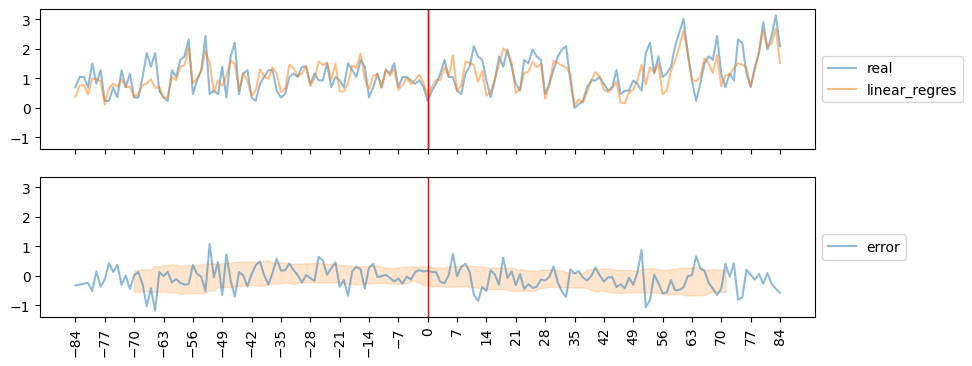

----------


2020-04-08 Sachsen
MSE: 0.13308676275827624


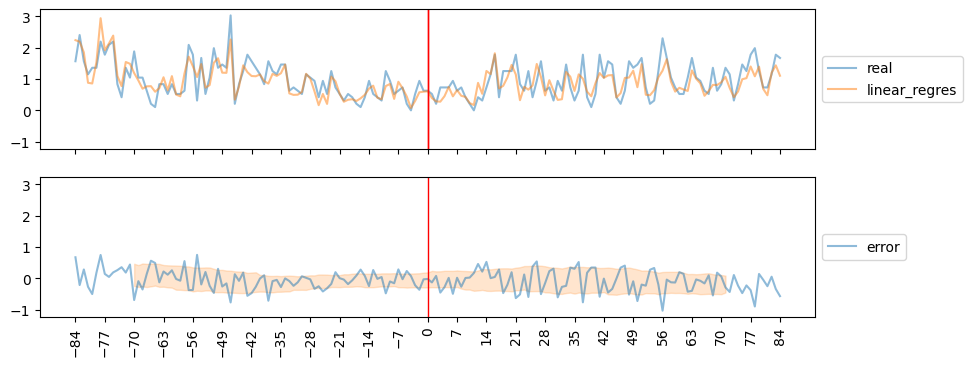

----------


2022-07-14 Rheinland-Pfalz
MSE: 0.06038350236313893


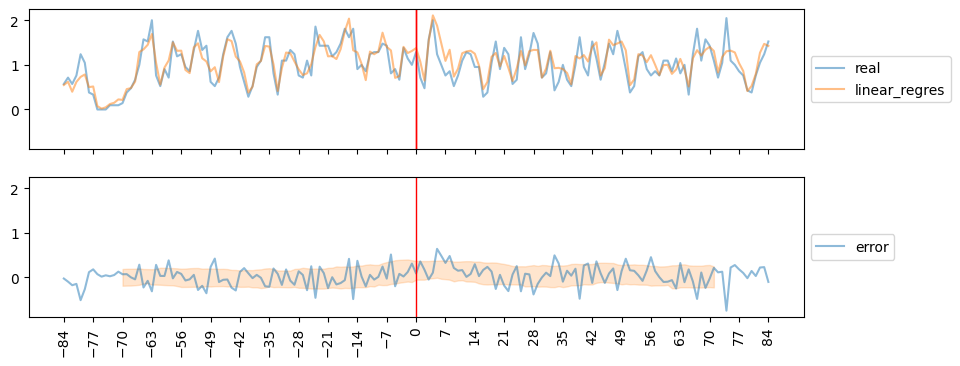

----------




In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from protest_impact.data.discourse.visual import plot_coverage_sequence

for metrics_, df in pd.Series(zip(metrics, dfs)).sample(5):
    print(metrics_["protest_date"].date(), metrics_["protest_region"])
    print("MSE:", metrics_["mse"])
    fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True, sharey=True)
    plot_coverage_sequence(df.rename(columns={"real": "count"}), ax=ax[0], label="real")
    plot_coverage_sequence(
        df.rename(columns={"synth": "count"}), ax=ax[0], label=metrics_["method"][:13]
    )
    df["error"] = df["synth"] - df["real"]
    plot_coverage_sequence(
        df.rename(columns={"error": "count"}), ax=ax[1], label="error"
    )
    # compute moving standard deviation of error
    r = 7 * 4
    df["error_std"] = df["error"].rolling(r, center=True).std()
    # plot as shaded area
    ax[1].fill_between(
        np.ceil(df.index - len(df) / 2),
        df["error"].rolling(r, center=True).mean() - df["error_std"],
        df["error"].rolling(r, center=True).mean() + df["error_std"],
        alpha=0.2,
        color="C1",
    )
    plt.show()
    print("----------\n\n")

In [36]:
from protest_impact.data.protests.sources.acled import load_acled

acled = load_acled()
from protest_impact.data.news.sources.mediacloud import newspapers_by_region

acled = acled[acled["admin1"].isin(newspapers_by_region.keys())]
climate_actors = [
    "FFF: Fridays for Future; Students (Germany)",
    # "ALG: Uprising of the Last Generation (Germany)",
    # "Extinction Rebellion",
    # "Ende Gelaende",
]
acled = acled[acled["assoc_actor_1"].isin(climate_actors)]
acled = acled[
    (acled["event_date"] >= "2020-07-01") & (acled["event_date"] < "2022-07-01")
]

In [37]:
from protest_impact.synthetic_region import (
    evaluate_multiple_protests,
    predict_with_boosting,
    predict_with_lasso,
    predict_with_linear_regression,
    predict_with_mean,
)

metrics, dfs, agg_df = evaluate_multiple_protests(
    "klima*",
    acled,
    source="mediacloud",
    data_kwargs=dict(min_control_regions=3, n_protest_free_days=7 * 4, n_days=7 * 4),
    method_kwargs=dict(
        method=predict_with_lasso,
    ),
)

  0%|          | 0/291 [00:00<?, ?it/s]

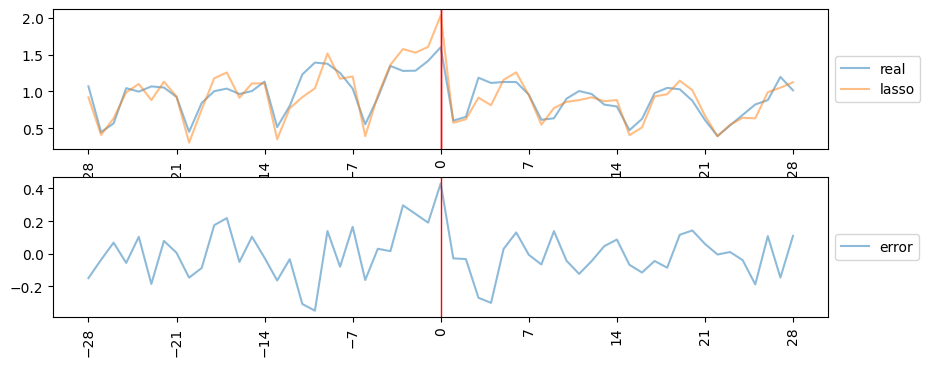

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from protest_impact.data.discourse.visual import plot_coverage_sequence

fig, ax = plt.subplots(2, 1, figsize=(10, 4))  # , sharex=True, sharey=True)
plot_coverage_sequence(agg_df.rename(columns={"real": "count"}), ax=ax[0], label="real")
plot_coverage_sequence(
    agg_df.rename(columns={"synth": "count"}), ax=ax[0], label="lasso"
)
agg_df["error"] = agg_df["synth"] - agg_df["real"]
plot_coverage_sequence(
    agg_df.rename(columns={"error": "count"}), ax=ax[1], label="error"
)
plt.show()

2021-03-19 Niedersachsen
MSE: 0.14723853658390307


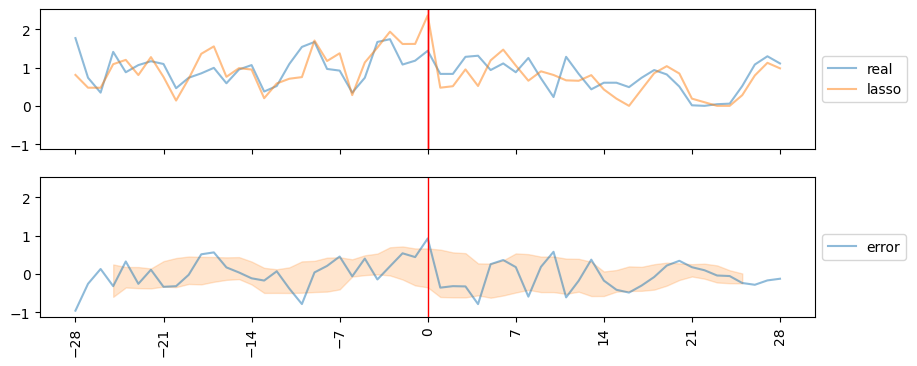

----------


2021-05-28 Saarland
MSE: 0.5611378942368905


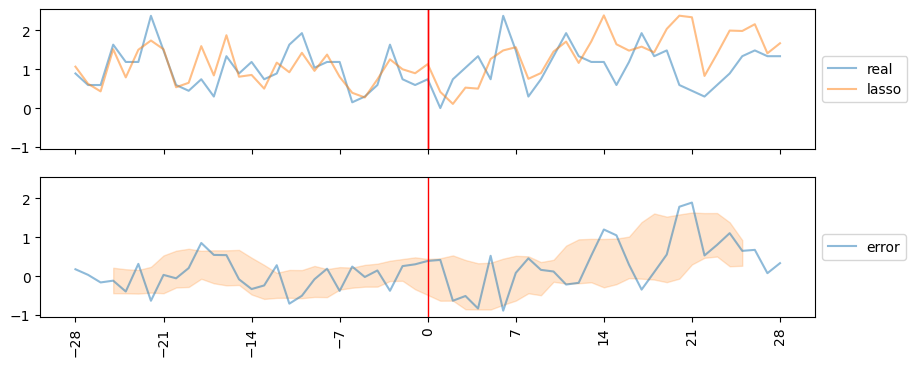

----------


2021-03-19 Bayern
MSE: 0.0786843857798051


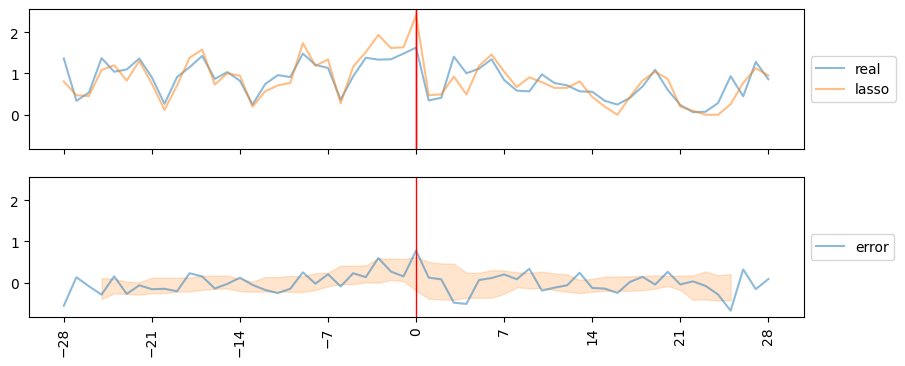

----------


2021-01-18 Hessen
MSE: 0.16573629587011307


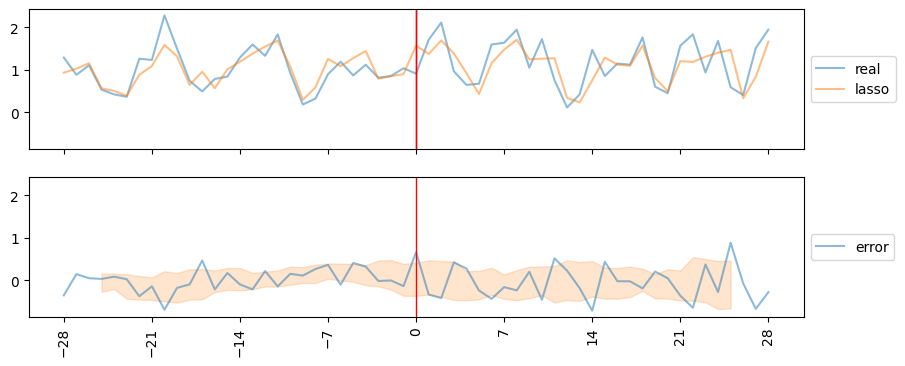

----------


2021-03-19 Saarland
MSE: 0.29686526061105606


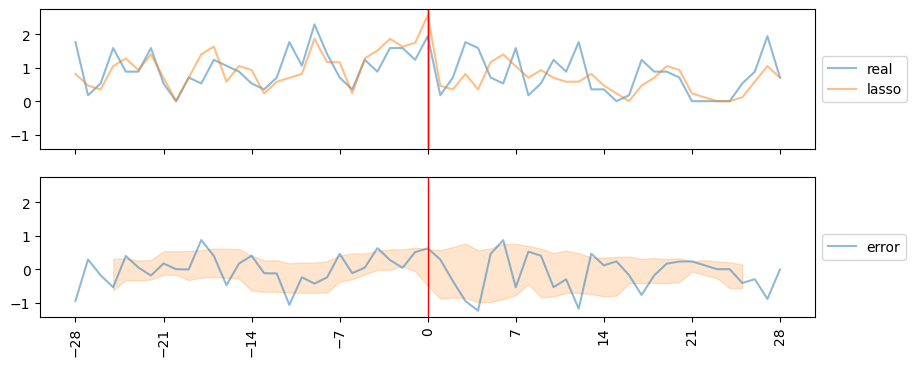

----------




In [39]:
for metrics_, df in pd.Series(zip(metrics, dfs)).sample(5):
    print(metrics_["protest_date"].date(), metrics_["protest_region"])
    print("MSE:", metrics_["mse"])
    fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True, sharey=True)
    plot_coverage_sequence(df.rename(columns={"real": "count"}), ax=ax[0], label="real")
    plot_coverage_sequence(
        df.rename(columns={"synth": "count"}), ax=ax[0], label=metrics_["method"][:13]
    )
    df["error"] = df["synth"] - df["real"]
    plot_coverage_sequence(
        df.rename(columns={"error": "count"}), ax=ax[1], label="error"
    )
    # compute moving standard deviation of error
    r = 7
    df["error_std"] = df["error"].rolling(r, center=True).std()
    # plot as shaded area
    ax[1].fill_between(
        np.ceil(df.index - len(df) / 2),
        df["error"].rolling(r, center=True).mean() - df["error_std"],
        df["error"].rolling(r, center=True).mean() + df["error_std"],
        alpha=0.2,
        color="C1",
    )
    plt.show()
    print("----------\n\n")